## 보스턴 집값 예측

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


### Boston Housing 데이터
#### Feature
- CRIM : 도시별 1인당 범죄율
- ZN : 25,000 피트를 초과하는 주거용 토지의 비율
- NDUS : 비상업 면적의 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 주택당 평균 방의 개수
- AGE : 1940년 이전에 건축된 자가주택의 비율
- DIS : 5개의 보스턴 고용 센터와의 거리
- RAD : 고속도로 접근성 지수
- TAX : 10,000달러당 재산세율
- PTRATIO : 도시별 교사와 학생 수 비율
- B : 마을의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
#### Target
- MEDV : 본인 소유의 주택 가격(중앙값, 단위: 천달러)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       455 non-null    object 
 1   CRIM     455 non-null    float64
 2   ZN       455 non-null    float64
 3   INDUS    455 non-null    float64
 4   CHAS     455 non-null    float64
 5   NOX      455 non-null    float64
 6   RM       455 non-null    float64
 7   AGE      455 non-null    float64
 8   DIS      455 non-null    float64
 9   RAD      455 non-null    float64
 10  TAX      455 non-null    float64
 11  PTRATIO  455 non-null    float64
 12  B        455 non-null    float64
 13  LSTAT    455 non-null    float64
 14  MEDV     455 non-null    float64
dtypes: float64(14), object(1)
memory usage: 53.4+ KB


In [4]:
# 학습 데이터 분리
x_data = df.drop(["ID", "MEDV"], axis = 1)
y_target = df["MEDV"]

xTrain, xTest, yTrain, yTest = train_test_split(x_data, y_target, test_size = 0.2, random_state = 0)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(364, 13) (91, 13) (364,) (91,)


### LinearRegression

In [5]:
# 1. LinearRegression 선언
model = LinearRegression()

# 2. 학습
model.fit(xTrain, yTrain)

# 3. 예측
y_pred = model.predict(xTest)
print(yTest[:5])
print(y_pred[:5])

# 4. 모델 평가
mse = mean_squared_error(yTest, y_pred)
rmse = np.sqrt(mse)
# r2_score (결정 계수) : 성능 측정 기준, 1에 가까울 수록 성능이 좋음 (0.7 이상)
r_squared = r2_score(yTest, y_pred)
print("LinearRegression : ", mse, rmse, r_squared)

354    37.3
60     18.4
293    26.4
414    19.2
113    19.6
Name: MEDV, dtype: float64
[33.77866133 19.29537892 21.92225039 19.91710695 17.36444357]
LinearRegression :  22.644903581774212 4.758666155738834 0.7189410339917255


In [6]:
print(f"절편 : {model.intercept_}")
print(f"회귀계수 : {np.round(model.coef_, 1)}")
coeff = pd.Series(data = np.round(model.coef_, 1), index = x_data.columns)
coeff.sort_values(ascending = False)

절편 : 33.003251575543885
회귀계수 : [ -0.1   0.    0.    2.8 -15.6   4.1  -0.   -1.4   0.3  -0.   -1.    0.
  -0.5]


RM          4.1
CHAS        2.8
RAD         0.3
ZN          0.0
INDUS       0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.4
NOX       -15.6
dtype: float64

## Ridge

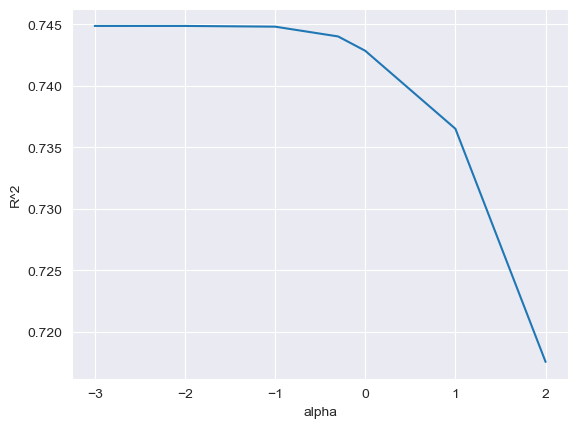

In [7]:
# 최적의 alpha 탐색
train_score = []

alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
for i in alpha_list :
    ridge = Ridge(alpha = i)
    ridge.fit(xTrain, yTrain)
    train_score.append(ridge.score(xTrain, yTrain))

plt.plot(np.log10(alpha_list), train_score) # alpha_list를 지수화하여 출력
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()
# 결정 계수가 1에 가까운 것이 최적의 alpha 값인데, 결정 계수가 1인 것은 과적합 이므로, 그 다음 1에 가까운 값이 alpha로 적절
# 여기서는 가장 큰 결정계수가 0.745이므로 alpha = e-3이 최적

In [8]:
# 1. Ridge 선언
ridge = Ridge(alpha = 0.001)

# 2. 학습
ridge.fit(xTrain, yTrain)

# 3. 예측
y_pred = ridge.predict(xTest)

# 4. 모델 평가
mse_rg = mean_squared_error(yTest, y_pred)
rmse_rg = np.sqrt(mse)
r_squared_rg = r2_score(yTest, y_pred)
print("Ridge : ", mse_rg, rmse_rg, r_squared_rg)

Ridge :  22.645700439284916 4.758666155738834 0.718931143733319


## Lasso

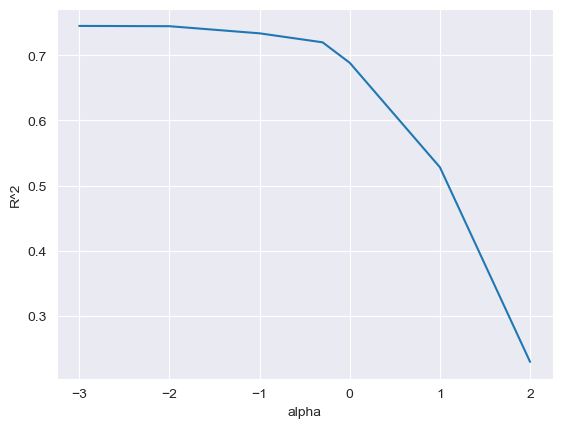

In [9]:
# 최적의 alpha 탐색
train_score = []

alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
for i in alpha_list :
    lasso = Lasso(alpha = i)
    lasso.fit(xTrain, yTrain)
    train_score.append(lasso.score(xTrain, yTrain))

plt.plot(np.log10(alpha_list), train_score) # alpha_list를 지수화하여 출력
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()
# 결정 계수가 1에 가까운 것이 최적의 alpha 값인데, 결정 계수가 1인 것은 과적합이기 때문에 그 다음 1에 가까운 값이 alpha로 적절
# 가장 큰 결정계수가 0.7..이므로 alpha = e-3이 최적

In [10]:
# 1. Lasso 선언
lasso = Lasso(alpha = 0.001)

# 2. 학습
lasso.fit(xTrain, yTrain)

# 3. 예측
y_pred = lasso.predict(xTest)

# 4. 모델 평가
mse_ls = mean_squared_error(yTest, y_pred)
rmse_ls = np.sqrt(mse)
r_squared_ls = r2_score(yTest, y_pred)
print("Ridge : ", mse_ls, rmse_ls, r_squared_ls)

Ridge :  22.6612517766508 4.758666155738834 0.718738127111088


In [11]:
print(f"1. LinearRegression\nmse : {mse}, rmse : {rmse}, r2_score : {r_squared}")
print(f"2. Ridge\nmse : {mse_rg}, rmse : {rmse_rg}, r2_score : {r_squared_rg}")
print(f"3. Lasso\nmse : {mse_ls}, rmse : {rmse_ls}, r2_score : {r_squared_ls}")

1. LinearRegression
mse : 22.644903581774212, rmse : 4.758666155738834, r2_score : 0.7189410339917255
2. Ridge
mse : 22.645700439284916, rmse : 4.758666155738834, r2_score : 0.718931143733319
3. Lasso
mse : 22.6612517766508, rmse : 4.758666155738834, r2_score : 0.718738127111088
